In [9]:
import img_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline


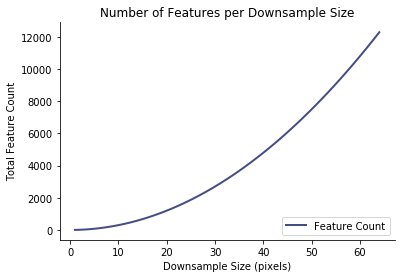

In [10]:
sizes = np.linspace(1, 64, 100)
features = [3*size**2 for size in sizes]
fig, axs = img_utils.make_subplot(rows=1, cols=1)
img_utils.lineplot(axs, sizes, features, 
                   label="Feature Count", x_label="Downsample Size (pixels)", y_label="Total Feature Count",
                   title="Number of Features per Downsample Size", color=1
                  )
# plt.savefig('../report/feature_graph.png', dpi=300, bbox_inches='tight')

In [11]:
nb = pd.read_csv('nb_data.csv', index_col=0)
lr = pd.read_csv('lr_data.csv', index_col=0)
crf_df = pd.read_csv('crf_data.csv', index_col=0)
bn = pd.read_csv('bayes_net_ret.csv', index_col=0)

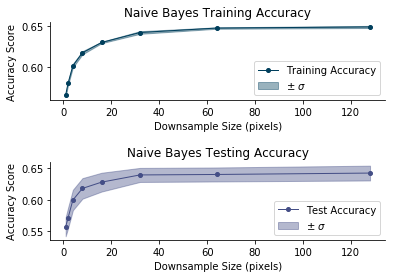

In [12]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_score.png', dpi=300, bbox_inches='tight')

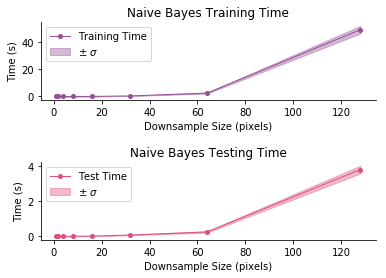

In [13]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['fit_time_mean']), list(nb['fit_time_std']), 
                   label="Training Time", title="Naive Bayes Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['score_time_mean']), list(nb['score_time_std']), 
                   label="Test Time", title="Naive Bayes Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time.png', dpi=300, bbox_inches='tight')

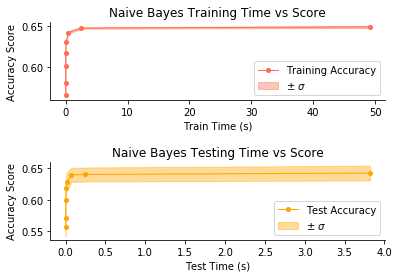

In [14]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(nb['fit_time_mean']), 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(nb['score_time_mean']), 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time_score.png', dpi=300, bbox_inches='tight')

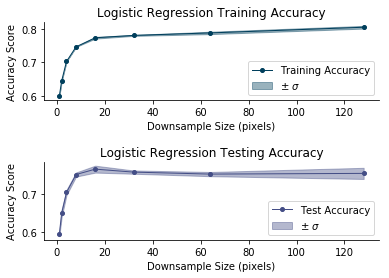

In [15]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_score.png', dpi=300, bbox_inches='tight')

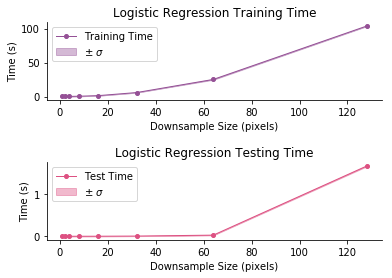

In [16]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['fit_time_mean']), list(lr['fit_time_std']), 
                   label="Training Time", title="Logistic Regression Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['score_time_mean']), list(lr['score_time_std']), 
                   label="Test Time", title="Logistic Regression Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time.png', dpi=300, bbox_inches='tight')

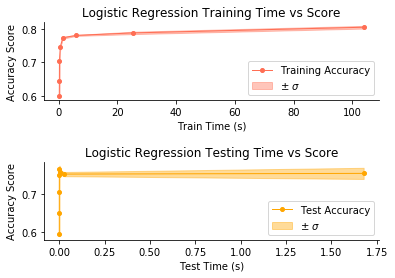

In [17]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(lr['fit_time_mean']), 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(lr['score_time_mean']), 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time_score.png', dpi=300, bbox_inches='tight')

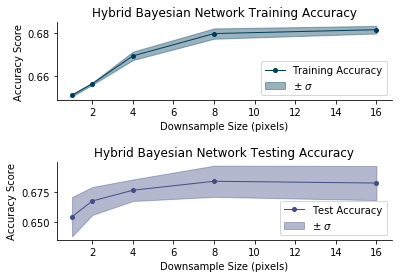

In [24]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
# axs[0].set_xlim([0,128])
# axs[1].set_xlim([0,128])
img_utils.lineplot_ci(axs[0], bn.index, 
                   list(bn['train_score_mean']), list(bn['train_score_std']), 
                   label="Training Accuracy", title="Hybrid Bayesian Network Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], bn.index, 
                   list(bn['test_score_mean']), list(bn['test_score_std']), 
                   label="Test Accuracy", title="Hybrid Bayesian Network Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/bn_graph_score.png', dpi=300, bbox_inches='tight')

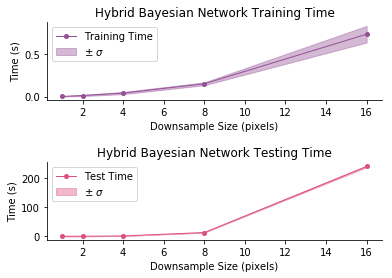

In [25]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], bn.index, 
                   list(bn['fit_time_mean']), list(bn['fit_time_std']), 
                   label="Training Time", title="Hybrid Bayesian Network Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], bn.index, 
                   list(bn['score_time_mean']), list(bn['score_time_std']), 
                   label="Test Time", title="Hybrid Bayesian Network Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/bn_graph_time.png', dpi=300, bbox_inches='tight')

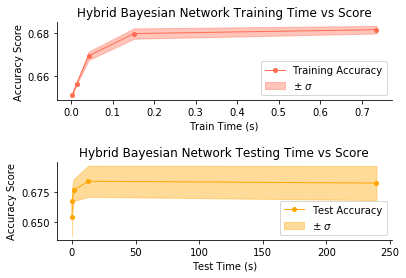

In [26]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(bn['fit_time_mean']), 
                   list(bn['train_score_mean']), list(bn['train_score_std']), 
                   label="Training Accuracy", title="Hybrid Bayesian Network Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(bn['score_time_mean']), 
                   list(bn['test_score_mean']), list(bn['test_score_std']), 
                   label="Test Accuracy", title="Hybrid Bayesian Network Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/bn_graph_time_score.png', dpi=300, bbox_inches='tight')

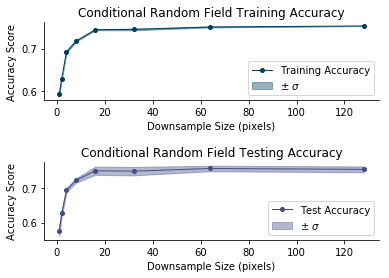

In [27]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], crf_df.index, 
                   list(crf_df['train_score_mean']), list(crf_df['train_score_std']), 
                   label="Training Accuracy", title="Conditional Random Field Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], crf_df.index, 
                   list(crf_df['test_score_mean']), list(crf_df['test_score_std']), 
                   label="Test Accuracy", title="Conditional Random Field Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/crf_graph_score.png', dpi=300, bbox_inches='tight')

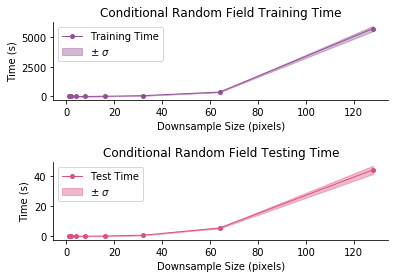

In [28]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], crf_df.index, 
                   list(crf_df['fit_time_mean']), list(crf_df['fit_time_std']), 
                   label="Training Time", title="Conditional Random Field Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], crf_df.index, 
                   list(crf_df['score_time_mean']), list(crf_df['score_time_std']), 
                   label="Test Time", title="Conditional Random Field Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/crf_graph_time.png', dpi=300, bbox_inches='tight')

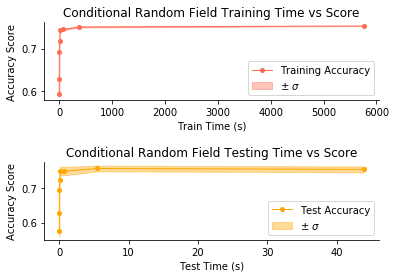

In [29]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(crf_df['fit_time_mean']), 
                   list(crf_df['train_score_mean']), list(crf_df['train_score_std']), 
                   label="Training Accuracy", title="Conditional Random Field Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(crf_df['score_time_mean']), 
                   list(crf_df['test_score_mean']), list(crf_df['test_score_std']), 
                   label="Test Accuracy", title="Conditional Random Field Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/crf_graph_time_score.png', dpi=300, bbox_inches='tight')